In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load heart data
df = pd.read_csv('haberman.csv')
df.head()

,age,op_year,ax_nodes,target
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [86]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=24)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, fbeta_score, precision_score, recall_score

# Fit and predict test class probabilities
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for f-beta, precision, and recall scores at different prob. thresholds
f1_scores = []
f0_5_scores = []
f2_scores = []
precision_scores = []
recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find scores for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(2)
        else:
            y_test_preds.append(1)
            
    f1 = f1_score(y_test, y_test_preds)
    f0_5 = fbeta_score(y_test, y_test_preds, beta=0.5)
    f2 = fbeta_score(y_test, y_test_preds, beta=2)
    prec = precision_score(y_test, y_test_preds)
    rec = recall_score(y_test, y_test_preds)
        
    f1_scores.append(f1)
    f0_5_scores.append(f0_5)
    f2_scores.append(f2)
    precision_scores.append(prec)
    recall_scores.append(rec)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


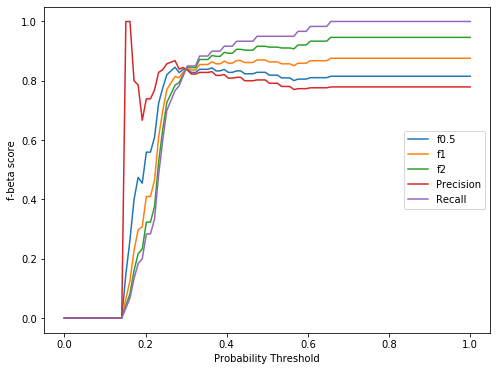

In [104]:
# Plot f_beta curves

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(probability_thresholds, f0_5_scores , label='f0.5')
ax.plot(probability_thresholds, f1_scores, label='f1')
ax.plot(probability_thresholds, f2_scores, label='f2')
ax.plot(probability_thresholds, precision_scores, label='Precision')
ax.plot(probability_thresholds, recall_scores, label='Recall')
ax.set_xlabel('Probability Threshold')
ax.set_ylabel('f-beta score')
ax.legend(loc='center right');

In [100]:
lr.predict_proba(X_test)[:,1]

array([0.18010821, 0.1711368 , 0.27914083, 0.1921049 , 0.25163953,
       0.17172758, 0.16662695, 0.44012549, 0.2508151 , 0.6554145 ,
       0.23704016, 0.23896343, 0.16164004, 0.29756084, 0.16454778,
       0.20155597, 0.26724847, 0.27570964, 0.23051805, 0.16871664,
       0.26391099, 0.59792534, 0.23051805, 0.22376414, 0.25935657,
       0.46823916, 0.1471234 , 0.18617942, 0.23471068, 0.23857742,
       0.32650072, 0.25978172, 0.57459135, 0.18458211, 0.2420841 ,
       0.15257327, 0.17541398, 0.27569476, 0.22747553, 0.28433473,
       0.395393  , 0.21931915, 0.1887953 , 0.23819434, 0.28957508,
       0.16871664, 0.30795217, 0.36122006, 0.17729128, 0.55936142,
       0.24884156, 0.19745174, 0.21496316, 0.21496316, 0.22375934,
       0.22485492, 0.23087684, 0.42332213, 0.19746135, 0.19077118,
       0.2460307 , 0.29578141, 0.23896343, 0.19746355, 0.38523327,
       0.29535475, 0.24841698, 0.23239959, 0.33027272, 0.225991  ,
       0.50189211, 0.2222711 , 0.36666678, 0.25245171, 0.14765

In [99]:
X_test

,age,op_year,ax_nodes
61,42,63,1
84,45,67,0
100,47,63,6
155,52,68,0
278,67,65,0
...,...,...,...
115,49,64,10
279,68,67,0
13,34,60,0
269,66,61,13
